In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import seaborn as sns

In [231]:
limInfX, limSupX = 0, 50
limInfY, limSupY = 0, 50

mean_x, mean_y = (limSupX - limInfX)/2, (limSupY - limInfY)/2
r1, r2 = 15, 20

scale = 1000
training_m = int(0.8 * scale)
normal_m = int(0.1 * scale)
abnormal_m = int(0.1 * scale)

nu = 0.005

size_ = 15

In [232]:
# Observaciones de entrenamiento (en forma de donut)

x_train, y_train = [], []
for _ in range(training_m):
    length = np.sqrt(np.random.uniform(r1**2, r2**2))
    angle = np.pi * np.random.uniform(0, 1.75)

    x = mean_x + length * np.cos(angle)
    y = mean_y + length * np.sin(angle)
    
    x_train.append(x)
    y_train.append(y)

X_train = np.c_[x_train, y_train]

In [233]:
# Observaciones de test normales

x_normal, y_normal = [], []
for _ in range(normal_m):
    length = np.sqrt(np.random.uniform(r1**2, r2**2))
    angle = np.pi * np.random.uniform(0, 1.75)

    x = mean_x + length * np.cos(angle)
    y = mean_y + length * np.sin(angle)
    
    x_normal.append(x)
    y_normal.append(y)
    
x_abnormal, y_abnormal = [], []
for _ in range(abnormal_m):
    length = np.sqrt(np.random.uniform(0.15 * r1**2, 0.8 * r1**2))
    angle = np.pi * np.random.uniform(0, 2)

    x = mean_x + length * np.cos(angle)
    y = mean_y + length * np.sin(angle)
    
    x_abnormal.append(x)
    y_abnormal.append(y)

X_normal = np.c_[x_normal, y_normal]
X_abnormal = np.c_[x_abnormal, y_abnormal]

In [237]:
# Entrenamos el modelo
clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Hacemos predicciones
y_train = clf.predict(X_train)
y_normal = clf.predict(X_normal)
y_abnormal = clf.predict(X_abnormal)

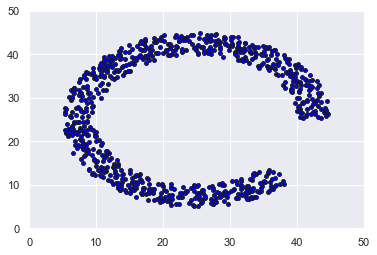

In [238]:
xx, yy = np.meshgrid(np.linspace(limInfX, limSupX, (limSupX - limInfX)*10),
                     np.linspace(limInfY, limSupY, (limSupX - limInfX)*10))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

sns.set_theme()

# Graficamos los puntos que observamos
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=size_, edgecolors='k')

# plt.axis('tight')
plt.xlim((limInfX, limSupX))
plt.ylim((limInfY, limSupY))

plt.show()

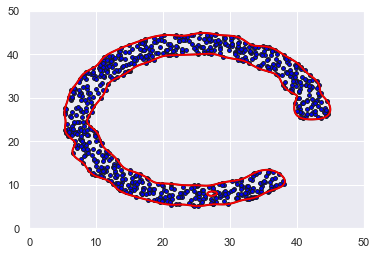

In [243]:
# Graficamos los puntos que observamos
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=size_, edgecolors='k')

# Graficamos las secciones en que la SVM considera una observación como "normal"
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='red')

# plt.axis('tight')
plt.xlim((limInfX, limSupX))
plt.ylim((limInfY, limSupY))

plt.show()

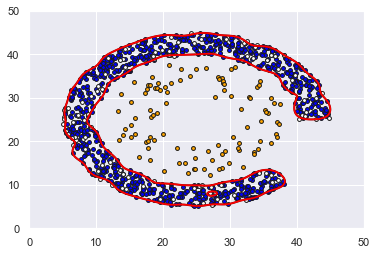

In [240]:
# Graficamos los puntos que observamos
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', s=size_, edgecolors='k')
b2 = plt.scatter(X_normal[:, 0], X_normal[:, 1], c='white', s=size_, edgecolors='k')
c = plt.scatter(X_abnormal[:, 0], X_abnormal[:, 1], c='orange', s=size_, edgecolors='k')

# Graficamos las secciones en que la SVM considera una observación como "normal"
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contour(xx, yy, Z, levels=[0, Z.max()], colors='red')

# plt.axis('tight')
plt.xlim((limInfX, limSupX))
plt.ylim((limInfY, limSupY))

plt.show()